In [1]:
import sys
sys.path.insert(0,'../PLASIM/')
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New

# log to stdout
import logging
import os
logging.getLogger().level = logging.INFO
logging.getLogger().handlers = [logging.StreamHandler(sys.stdout)]

# set spacing of the indentation
ut.indentation_sep = '  '

2023-01-24 10:59:30.319368: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
In this environment you cannot import Basemap


In [4]:
import importlib as imp
imp.reload(ln)
imp.reload(ef)

path_to_ERA = '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe'/ERA/
Trying to import basemap
In this environment you cannot import Basemap
Trying to import cartopy
Successfully imported cartopy


<module 'ERA.ERA_Fields_New' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/ERA/ERA_Fields_New.py'>

In [5]:
import itertools as its
ln.fields_infos['t2m'] = { # how we label the field
        'name': 'TSA', # how the variable is called in the *.nc files
        'filename_suffix': 'TSA', # the ending of the filename
        'label': 'Temperature',
    }
ln.fields_infos['mrso'] = { # how we label the field
        'name': 'H2OSOI', # how the variable is called in the *.nc files
        'filename_suffix': 'H2OSOI', # the ending of the filename
        'label': 'soil moisture',
    }
ln.fields_infos['zg500'] = { # how we label the field
        'name': 'Z3', # how the variable is called in the *.nc files
        'filename_suffix': 'Z3.500hPa', # the ending of the filename
        'label': '500 mbar Geopotential',
    }
Months1 = [0, 0, 0, 0, 0, 0, 31, 30, 31, 31, 30, 0, 0, 0] # Because of 3 day running mean we lose 2 days
Tot_Mon1 = list(its.accumulate(Months1))
X, Y, yp, lat, lon = ln.prepare_data(**ut.set_values_recursive(ln.get_default_params(ln.prepare_data, recursive=True),
                                              {'fields': ['t2m','zg500','mrso'], 'year_list' : 'range(100)', 'mylocal' : '/local/gmiloshe/CESM/', 
                                               'time_start' : Tot_Mon1[6], 'time_end' : Tot_Mon1[9], # Take into account number of days per month in CESM
                                               'lon_start' : - 288//2, 'lon_end' : 288//2,
                                                'lat_end' : 192, 'lat_start' : 192-192*60//180, # latitudes start from 90 degrees North Pole
                                               'Model' : 'CESM', 'datafolder' : 'Data_CESM', 'dataset_years' : 1000, 'preprefix' : 'North_Anomalies_'}))
LON, LAT = ln.np.meshgrid(lon, lat)

prepare_data:
  load_data:
    Opening field TSA
    First valid path found in /local/gmiloshe/CESM/Data_CESM/North_Anomalies_TSA.nc
    monotonize_years:
    monotonize_years: completed in 0.7 s
    First valid path found in /local/gmiloshe/CESM/Data_CESM/CAM_landmask.nc
    First valid path found in /local/gmiloshe/CESM/Data_CESM/CAM_cellarea.nc
    select_years:
    select_years: completed in 1.4 s
    select_lonlat:
    select_lonlat: completed in 0.6 s
    First valid path found in /local/gmiloshe/CESM/Data_CESM/CAM_landmask.nc
    sort_lat:
    sort_lat: completed in 0.5 s
    Opening field Z3
    First valid path found in /local/gmiloshe/CESM/Data_CESM/North_Anomalies_Z3.500hPa.nc
    monotonize_years:
    monotonize_years: completed in 0.4 s
    First valid path found in /local/gmiloshe/CESM/Data_CESM/CAM_landmask.nc
    First valid path found in /local/gmiloshe/CESM/Data_CESM/CAM_cellarea.nc
    select_years:
    select_years: completed in 1.4 s
    select_lonlat:
    select_l

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fc53da8a5e0>


/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/general_purpose/cartopy_plots.py:138: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, label=colorbar_label, extend='both')


<GeoAxesSubplot:>

<Figure size 648x432 with 0 Axes>

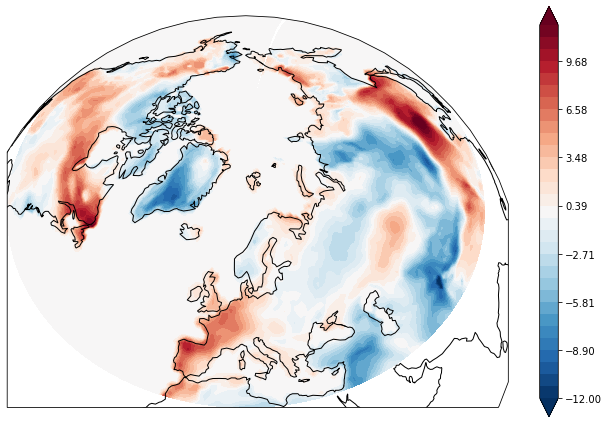

In [104]:
LON, LAT = ln.np.meshgrid(lon, lat)
import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, X[0,...],projections=[ccrs.Orthographic(10, 55)],
                         fig_num=8, put_colorbar=True, use_norm=False, levs=np.linspace(-12,12,32),
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='contourf',draw_labels=False,draw_gridlines=False,
                        )

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7f3e9f8293a0>


<GeoAxesSubplot:>

<Figure size 648x432 with 0 Axes>

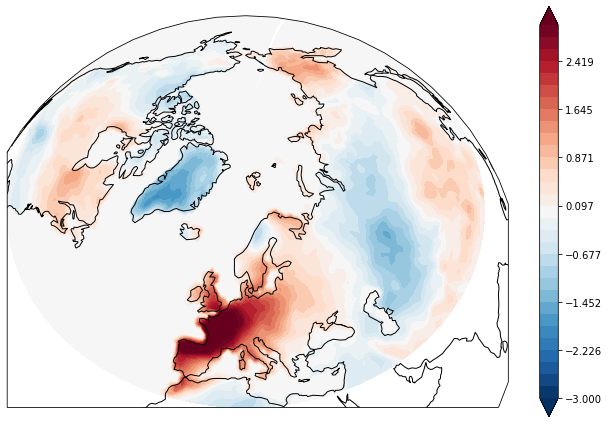

In [13]:
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, np.mean(X[Y==1],0),projections=[ccrs.Orthographic(10, 55)],
                         fig_num=8, put_colorbar=True, use_norm=False, levs=np.linspace(-3,3,32),
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='contourf',draw_labels=False,draw_gridlines=False,
                        )